In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv('../data/csv/DC_Tweets_5days_CSV.csv')
df.head

/Users/jacquelinekazil/Projects/envs/class/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


<bound method DataFrame.head of                 X          Y        id_str   coor_lat  coor_long coorpt  \
0      -77.089976  38.829701  5.945466e+17  38.829701 -77.089976  Point   
1      -76.478026  39.356915  5.945466e+17  39.356915 -76.478026  Point   
2      -78.176973  39.161643  5.945466e+17  39.161643 -78.176973  Point   
3      -76.357715  39.525552  5.945466e+17  39.525552 -76.357715  Point   
4      -76.610730  39.291000  5.945466e+17  39.291000 -76.610730  Point   
5      -77.045586  38.899025  5.945466e+17  38.899025 -77.045586  Point   
6      -77.051218  38.930026  5.945466e+17  38.930026 -77.051218  Point   
7      -77.045988  38.905674  5.945466e+17  38.905674 -77.045988  Point   
8      -76.835891  39.494401  5.945466e+17  39.494401 -76.835891  Point   
9      -76.595096  39.020527  5.945467e+17  39.020527 -76.595096  Point   
10     -76.967627  38.621353  5.945467e+17  38.621353 -76.967627  Point   
11     -77.014686  39.001828  5.945467e+17  39.001828 -77.014686  Po

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt


## K-means samples

In [6]:
from sklearn.cluster import KMeans

df = df
def graph_kmeans(clusters, lookup_keys=['X','Y']):
    k_means = KMeans(clusters)  # number of clusters
    output = k_means.fit(df[lookup_keys]).labels_
    
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbelow':True})
    ax.scatter(df['X'], df['Y'], c=output)
    return

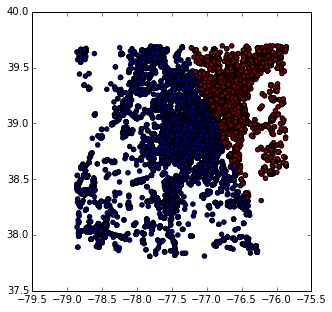

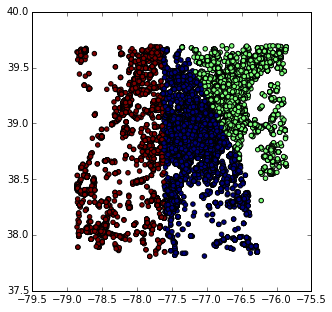

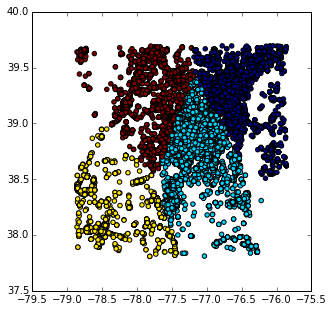

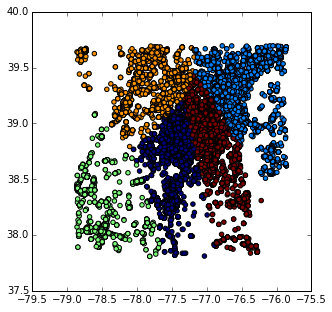

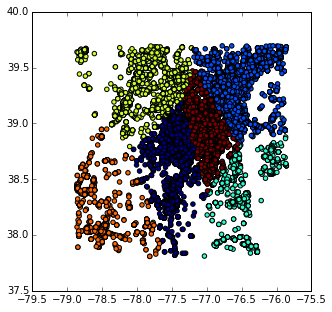

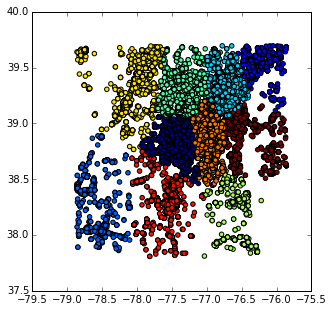

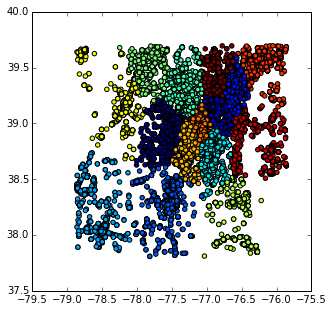

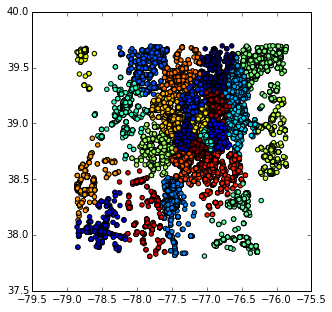

In [11]:
graph_kmeans(2)
graph_kmeans(3)
graph_kmeans(4)
graph_kmeans(5)
graph_kmeans(6)
graph_kmeans(10)
graph_kmeans(15)
graph_kmeans(25)

## DBSCAN
http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [22]:
import numpy as np


In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

df = df
lookup_keys=['X','Y']
db = DBSCAN(eps=0.3, min_samples=10).fit(df[lookup_keys])  # number of clusters


In [26]:
#db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 1


NameError: name 'labels_true' is not defined

In [ ]:
##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()